In [46]:
#import relevant modules
import pandas as pd
import numpy as np
import pandas_datareader as data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [27]:
#set the url that we will scrape the Dow 30 ticker information from 
dow = 'https://www.cnbc.com/dow-components/'

#read in the url and scrape ticker data
data_table = pd.read_html(dow)

#convert ticker column to list
tickers = data_table[:][0]['Symbol'].tolist()

#download daily pricing data for each ticker in the Dow 30
prices = get_prices(tickers,'01/01/2017')

#Calculate percentage return over download period
returns = (((prices.iloc[-1] / prices.iloc[0]) - 1) * 100).round(2)

In [33]:
#create a small function that we can feed a list of stock tickers to to download pricing data
def get_prices(tickers,start):
    prices = data.DataReader(tickers,'yahoo',start=start)['Adj Close']
    return prices

tickers = ["AWK","GOOG","SAP","TSLA","VFIAX","AAPL"]
start = datetime.datetime(2014, 8, 31)
end = datetime.datetime(2019, 8, 31)
df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers
tickers
prices = get_prices(tickers,'07/31/2014')
prices
returns = (((prices.iloc[-1] / prices.iloc[0]) - 1) * 100).round(2)


In [34]:
returns.shape

(6,)

In [38]:
#create a reshaped array of ticker symbols that matches the desired shape of the heatmap
symbol = ((np.asarray(returns.index)).reshape(2,3))

#create a reshaped array of percent returns that matches the desired shape of the heatmap
per_change = ((np.asarray(returns)).reshape(2,3))


#create a new array of the same shape as desired, combining the relevant ticker symbol
#and percentage return data
labels = (np.asarray(["{0} \n {1:.3f}".format(symbol, per_change)
                      for symbol, per_change in zip(symbol.flatten(),
                                               per_change.flatten())])).reshape(2,3)

ValueError: cannot reshape array of size 6 into shape (6,6)

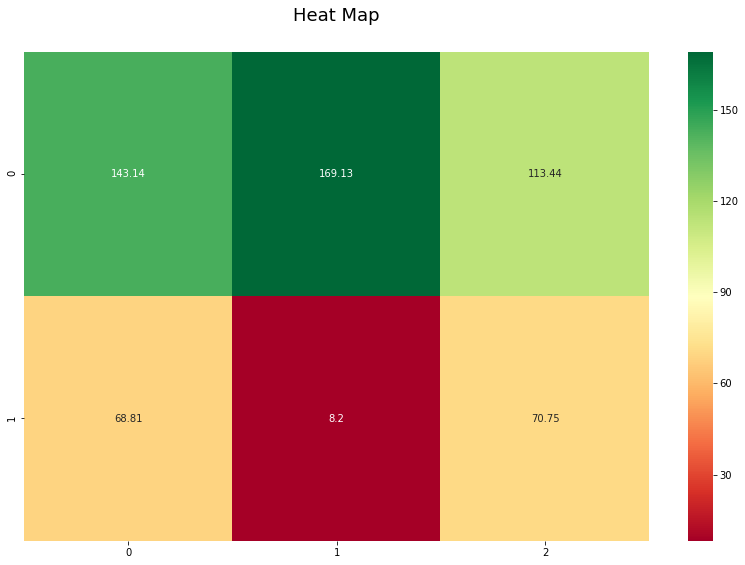

In [39]:
fig, ax = plt.subplots(figsize=(14,9))
plt.title('Heat Map',fontsize=18)
ax.title.set_position([0.5,1.05])
ax.set_xticks([])
sns.heatmap(per_change, annot=True, fmt="", cmap='RdYlGn', ax=ax)
plt.show()

In [43]:
retscomp = df.pct_change()

corr = retscomp.corr()
corr

,AWK,GOOG,SAP,TSLA,VFIAX,AAPL
AWK,1.000000,0.152723,0.168185,0.055258,0.311942,0.119006
GOOG,0.152723,1.000000,0.415938,0.296482,0.655016,0.503613
SAP,0.168185,0.415938,1.000000,0.245221,0.591497,0.400588
TSLA,0.055258,0.296482,0.245221,1.000000,0.391165,0.302125
VFIAX,0.311942,0.655016,0.591497,0.391165,1.000000,0.656250
AAPL,0.119006,0.503613,0.400588,0.302125,0.656250,1.000000


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


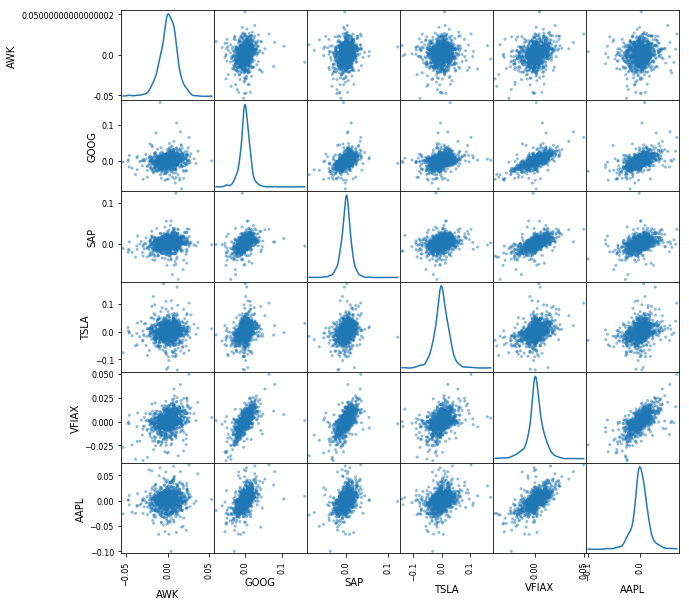

In [48]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

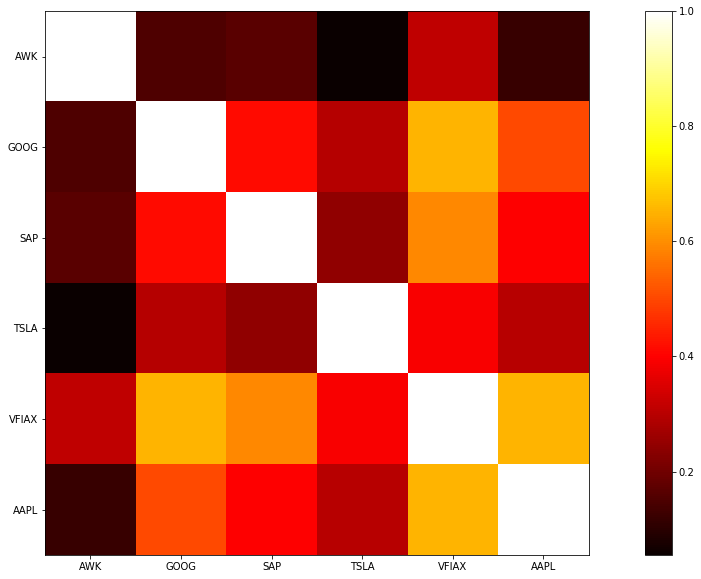

In [47]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);